# Sonlu Kare Kuyu ve "Transcendental" Çözümü

In [1]:
### kare kuyu :
from math import *

def f(x) :
    return x + asin(x/R) - n*pi/2

hbar2m = 3.81
a = 3.0
V0 = 50.0
R = sqrt(V0/hbar2m)*a
tol = 10**(-6)
ui = 0.001*R
us = 0.999*R

def yarila(f, ui, us, tol):
    if f(ui)*f(us) > 0 :
        xm = False
    else :
        dx = us-ui
        while(abs(dx)>tol):
            xm = (ui+us)/2
            if f(ui)*f(xm)<0:
                us = xm
                dx = us-ui
            else:
                ui = xm
                dx = us-ui
    if xm==False: print("Kök yok")
    return xm

En_list = []
print((3*"{:^17s}").format("n", "xkok", "enerji"))
for i in range(50):
    n = i+1
    YY = yarila(f, ui, us, tol)
    if YY == False:
        break
    else:
        xkok = YY
        enerji = hbar2m*(xkok/a)**2
        En_list += [enerji]
        print("{:15.10f}{:15.10f}{:15.10f}".format(n, xkok, enerji))


        n              xkok            enerji      
   1.0000000000   1.4380820618   0.8754872070
   2.0000000000   2.8739636141   3.4965923020
   3.0000000000   4.3050896669   7.8459740805
   4.0000000000   5.7280442254  13.8897743743
   5.0000000000   7.1374783222  21.5661226455
   6.0000000000   8.5232680966  30.7535152627
   7.0000000000   9.8590527211  41.1483897026
Kök yok


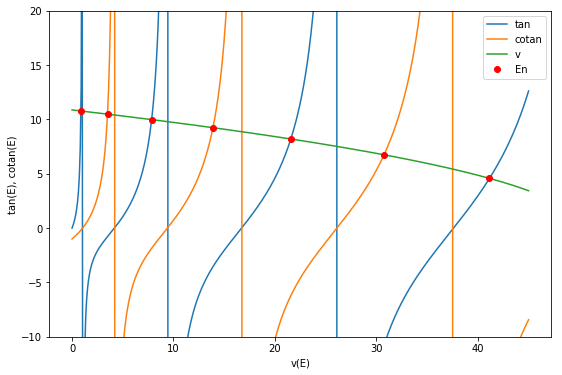

In [2]:
# Kare kuyu transendental denklemi grafiği :
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

En = linspace(1e-6, 45, 500)
u = lambda E: sqrt(E/hbar2m)*a
v = lambda E: sqrt((V0-E)/hbar2m)*a

ykok = v(asarray(En_list))
ytu = u(En)*tan(u(En))
ycu = -u(En)/tan(u(En))
yv = v(En)


plt.figure(figsize=(9,6))
plt.plot(En, ytu, label="tan")
plt.plot(En, ycu, label="cotan")
plt.plot(En, yv, label = "v")

plt.plot(En_list, ykok, "ro", label="En")

#plt.xlim(0,6)
plt.ylim(-10,20)

plt.xlabel("v(E)")
plt.ylabel("tan(E), cotan(E)")
plt.legend(loc="best")
plt.show()

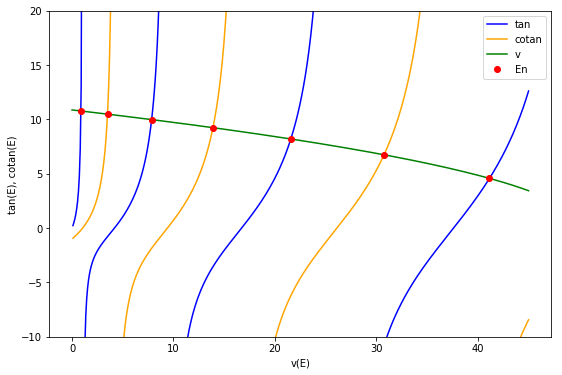

In [3]:
# Kare kuyu transendental denklemi grafiği :
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

En = linspace(1e-6, 45, 500)
u = lambda E: sqrt(E/hbar2m)*a
v = lambda E: sqrt((V0-E)/hbar2m)*a

ykok = v(asarray(En_list))
ytu = u(En)*tan(u(En))
ycu = -u(En)/tan(u(En))
yv = v(En)


plt.figure(figsize=(9,6))

i_start=0
for i, yi in enumerate(ytu[:-1]):
    label = "tan" if i_start == 0 else ""
    if yi*ytu[i+1]<0 and abs(yi-ytu[i+1])>1:
        plt.plot(En[i_start+1:i+1], ytu[i_start+1:i+1], label=label, color = 'blue')
        i_start = i

plt.plot(En[i_start+1:], ytu[i_start+1:], color = 'blue')        

   
i_start=0
for i, yi in enumerate(ycu[:-1]):
    label = "cotan" if i_start == 0 else ""
    if yi*ycu[i+1]<0 and abs(yi-ycu[i+1])>1:
        plt.plot(En[i_start+1:i+1], ycu[i_start+1:i+1], label=label, color = 'orange')
        i_start = i        

plt.plot(En[i_start+1:], ycu[i_start+1:], color = 'orange')  

plt.plot(En, yv, label = "v", color="green")
plt.plot(En_list, ykok, "ro", label="En")


#plt.xlim(0,6)
plt.ylim(-10,20)

plt.xlabel("v(E)")
plt.ylabel("tan(E), cotan(E)")
plt.legend(loc="best")
plt.show()

## Başka bir diferansiyel denklem

In [4]:
import sympy as s
s.init_printing()

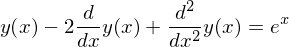

In [5]:
x = s.symbols('x')
y = s.Function('y')
eq = s.Eq(s.diff(y(x), x, x) - 2*s.diff(y(x), x) + y(x), s.exp(x))

eq

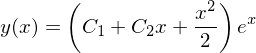

In [6]:
sol = s.dsolve(eq)
sol

In [7]:
ys = lambda x: sol.rhs.subs(s.Symbol('x'),x)
dys = lambda x0: s.diff(ys(x), x).subs(x, x0)

In [8]:
display(s.Eq(ys(0),0))
display(s.Eq(dys(0),0))

In [9]:
yo = lambda x0: ys(x).subs({s.Symbol('C1'):0, s.Symbol('C2'):0})

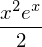

In [10]:
yo(x)